In [1]:
%%capture
!pip install mplhep --user

In [1]:
import numpy as np
import mplhep as hep
import ipywidgets as widget
import config, tools, plotting
import os, sys
import ROOT

Welcome to JupyROOT 6.24/06


In [8]:
filenames = [
    "TTToSemiLepton_HT500Njet9_UL2017_1.root",
    "TTToSemiLepton_HT500Njet9_UL2017_2.root"
]
lumitext = "SemiLepton HT500Njet9"
year = "UL 2017"

rFiles = { filename: ROOT.TFile.Open( filename ) for filename in filenames }
rTrees = { filename: rFiles[ filename ].Get( "btagana" ).Get( "ttree" ) for filename in filenames }

savedir = "./{}_UL{}".format( lumitext, year )
if not os.path.exists( savedir ):
    os.mkdir( savedir )

In [9]:
btagger_ = widget.Dropdown( options = config.wp.keys(), value = "deepJet" )
btagger_

Dropdown(index=1, options=('deepCSV', 'deepJet'), value='deepJet')

In [10]:
wp_ = widget.Dropdown( options = config.wp[ btagger_.value ].keys(), value = "MEDIUM" )
wp_

Dropdown(index=1, options=('LOOSE', 'MEDIUM', 'TIGHT'), value='MEDIUM')

### Determine event jet multiplicities and $\Delta z_{(GEN,RECO)}$

In [11]:
event_stats, bin_hists = tools.get_bins( rTrees, btagger_.value, wp_.value )

[START] Evaluating bins for:
  + jet multiplicity
  + b jet multiplicity
  + dz PV(RECO,GEN)
>> Loading: TTToSemiLepton_HT500Njet9_UL2017_1.root


100%|██████████| 46792/46792 [00:20<00:00, 2261.80it/s]


>> Loading: TTToSemiLepton_HT500Njet9_UL2017_2.root


100%|██████████| 55451/55451 [00:25<00:00, 2200.15it/s]


### Plot $N_j$, $N_b$ and $\Delta z$

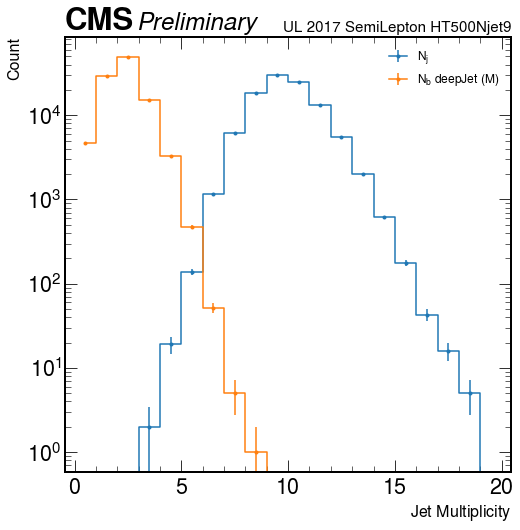

In [12]:
plotting.plot_1D(
    bin_hists, [ "nJ", "nB" ],
    year, lumitext, "Jet\ Multiplicity", 
    btagger_.value, wp_.value,
    "{}/jets_UL{}.png".format( savedir, year )
)

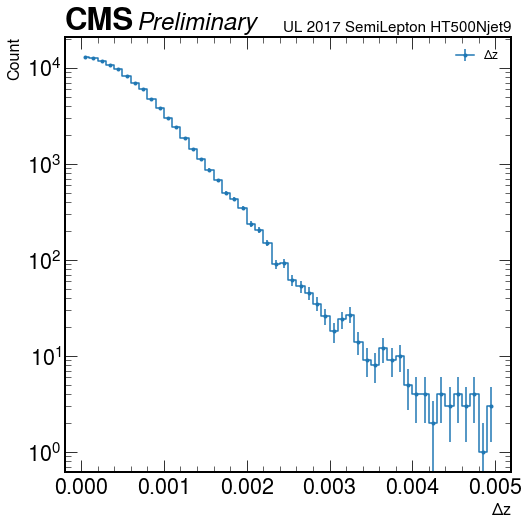

In [13]:
plotting.plot_1D(
    bin_hists, [ "dz" ],
    year, lumitext, config.plot_params[ "dz" ][ "LATEX" ],
    btagger_.value, wp_.value,
    "{}/dz_UL{}.png".format( savedir, year )
)

## Plot variables binned by $N_j$, $N_b$ and $\Delta z_{PV}$

In [14]:
branches = [ branch.GetName() for branch in rTrees[ list( rTrees.keys() )[0] ].GetListOfBranches() ]
variable = widget.Dropdown( options = sorted( branches ), value = "Jet_pt" )
variable

Dropdown(index=7, options=('GenPVz', 'Jet_DeepCSVb', 'Jet_DeepCSVbb', 'Jet_DeepFlavourB', 'Jet_DeepFlavourBB',…

### Populate selected variable histogram

In [15]:
hist_bins = {
    "nJ": np.linspace( min(bin_hists["nJ"]), max(bin_hists["nJ"]), max(bin_hists["nJ"]) - min(bin_hists["nJ"]) + 1 ),
    "nB": np.linspace( min(bin_hists["nB"]), max(bin_hists["nB"]), max(bin_hists["nB"]) - min(bin_hists["nB"]) + 1 ),
    "dz": np.linspace( 0, 0.005, 11 )
}

In [16]:
hists = tools.get_hist( rTrees, event_stats, hist_bins, variable.value )

100%|██████████| 84000/84000 [00:04<00:00, 18887.18it/s]


### Variable binned by $N_j$

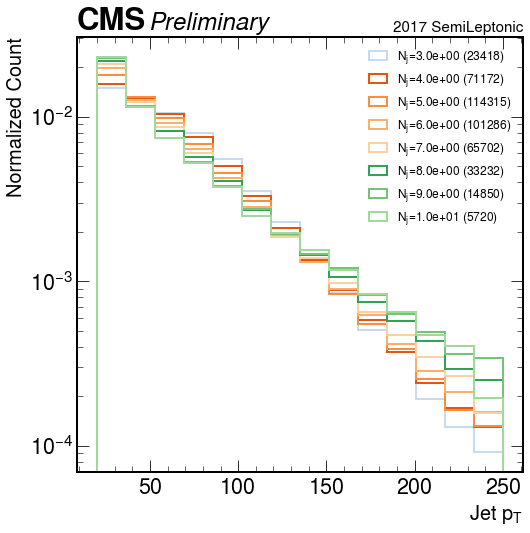

In [17]:
plotting.plot_binned(
    hists, variable.value,
    "nJ", hist_bins,
    year, lumitext, btagger_.value, wp_.value
)

### Variable binned by $N_b$

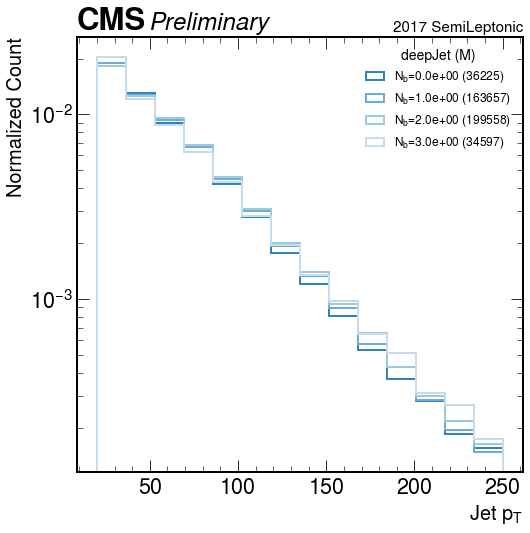

In [18]:
plotting.plot_binned(
    hists, variable.value,
    "nB", hist_bins,
    year, lumitext, btagger_.value, wp_.value
)

### Variable binned by $\Delta z_{PV}$

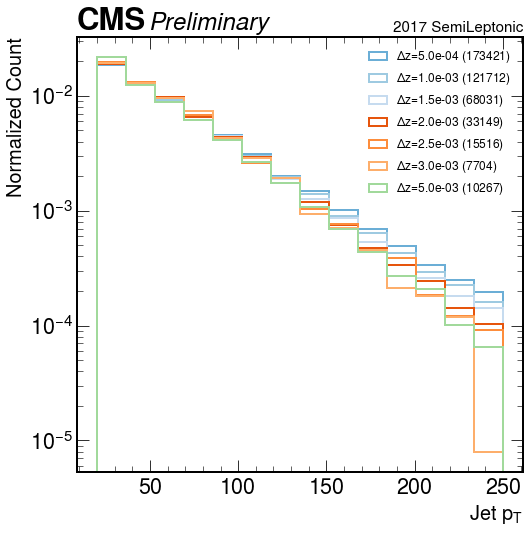

In [19]:
plotting.plot_binned(
    hists, variable.value,
    "dz", hist_bins,
    year, lumitext, btagger_.value, wp_.value
)

## Plot 2D-binned distributions

In [20]:
nJ_edges = np.linspace( 6, 15, 10 )
nB_edges = np.linspace( 0, 5, 6 )

hist_2D = tools.get_hist_nJnB( 
    rTrees, variable.value, 
    nJ_edges, nB_edges, 
    btagger_.value, wp_.value 
)

100%|██████████| 84000/84000 [00:32<00:00, 2554.33it/s]


/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
/cvmfs/sft.cern.ch/lcg/views/LCG_101swan/x86_64-centos7-gcc8-opt/lib/python3.9/site-packages/numpy/lib/histograms.py:906: RuntimeWarning: invalid value 

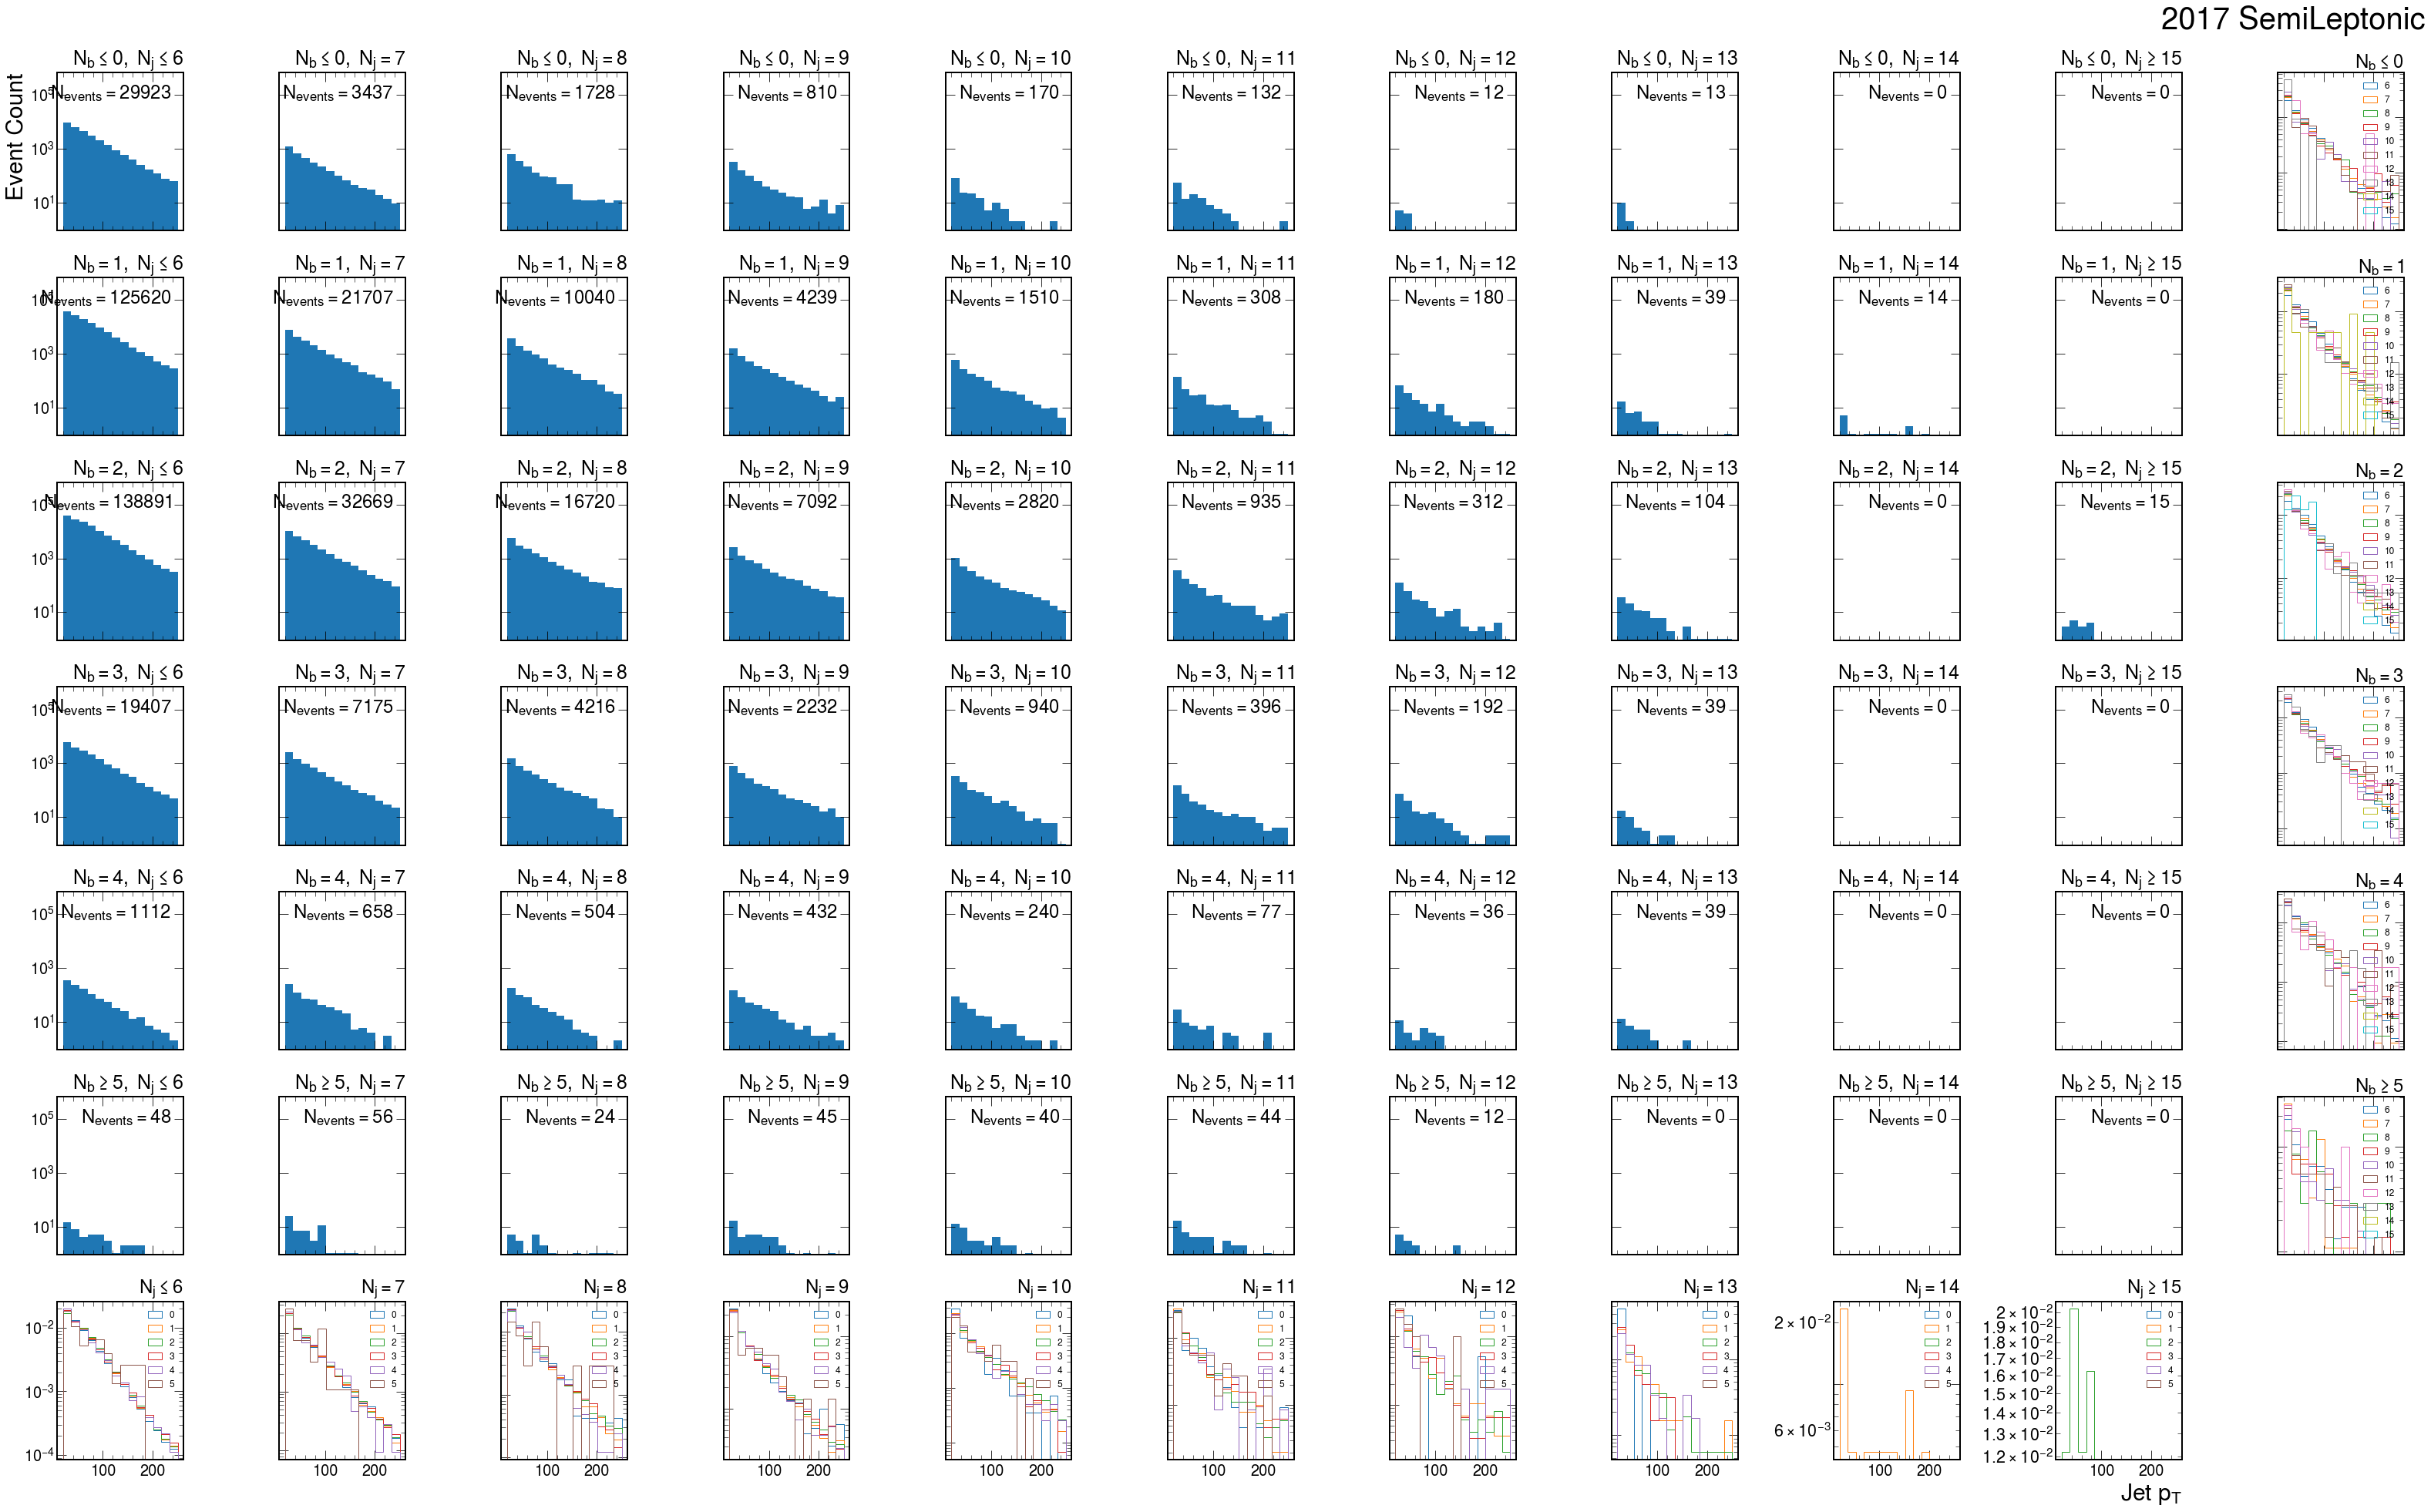

In [21]:
plotting.plot_hist_nJnB( 
    hist_2D, variable.value, 
    nJ_edges, nB_edges, 
    year, lumitext, 
    "{}/{}_nJnB.png".format( savedir, variable.value ) 
)